<a href="https://colab.research.google.com/github/ph-spec/Credit-card-default-prediction/blob/main/Data%20Analysis%20%26%20Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np

In [2]:

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import sqlite3

In [3]:
import os
from sklearn import tree
import scipy
from scipy import stats
from scipy.stats import pearsonr

In [4]:

from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
import requests
import warnings

**UPLOAD DATASET**

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
file_path = '/content/drive/My Drive/credi.csv'

In [7]:
creditt = pd.read_csv(file_path)

In [8]:
creditt.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**DATASET DESCRIPTION**



This dataset contains  records of 30000 customers.
29999 instances will be used to train and tes the model in the ratio of 80% for training and 20% for testing
1 instance will be used test the trained model performance on tkinker interface

Below are the description of all features in the dataset

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

SEX: Gender (1 = male, 2 = female)

EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

AGE: Age in years

Scale for PAY_0 to PAY_6 : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

PAY_0: Repayment status in September, 2005 (scale same as above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In [9]:
creditt.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,29999.0,15000.000000,8660.109699,1.0,7500.5,15000.0,22499.5,29999.0
LIMIT_BAL,29999.0,167488.238941,129748.050993,10000.0,50000.0,140000.0,240000.0,1000000.0
SEX,29999.0,1.603753,0.489125,1.0,1.0,2.0,2.0,2.0
EDUCATION,29999.0,1.853128,0.790361,0.0,1.0,2.0,2.0,6.0
MARRIAGE,29999.0,1.551885,0.521969,0.0,1.0,2.0,2.0,3.0
AGE,29999.0,35.485150,9.217858,21.0,28.0,34.0,41.0,79.0
PAY_0,29999.0,-0.016701,1.123820,-2.0,-1.0,0.0,0.0,8.0
PAY_2,29999.0,-0.133771,1.197206,-2.0,-1.0,0.0,0.0,8.0
PAY_3,29999.0,-0.166206,1.196887,-2.0,-1.0,0.0,0.0,8.0
PAY_4,29999.0,-0.220674,1.169157,-2.0,-1.0,0.0,0.0,8.0


In [10]:
creditt.shape

(29999, 25)

In [11]:
creditt['EDUCATION'].value_counts()

,count
EDUCATION,
2,14029
1,10585
3,4917
5,280
4,123
6,51
0,14


In [12]:

creditt.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [13]:
#check for duplicate
len(creditt[creditt.duplicated()])

0

In [14]:

#  check for missing value
creditt.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


DATA PROCESSING

In [15]:
#columns rename
creditt.rename(columns={'default payment next month':'DEFAULT_PAYMENT'}, inplace=True)
#Replacing values with their labels
creditt.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
creditt.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
creditt.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
creditt.replace({'DEFAULT_PAYMENT' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [16]:
creditt.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Yes
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


In [17]:
creditt.dtypes

,0
ID,int64
LIMIT_BAL,int64
SEX,object
EDUCATION,object
MARRIAGE,object
AGE,int64
PAY_0,int64
PAY_2,int64
PAY_3,int64
PAY_4,int64


### DATA ANALYSIS**

DEFAULT_PAYMENT

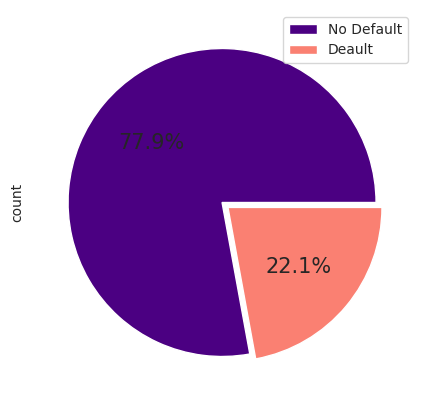

In [18]:
plt.figure(figsize=(7,5))
creditt['DEFAULT_PAYMENT'].value_counts().plot(kind='pie',labels=['',''],autopct='%1.1f%%',colors=['indigo','salmon'],explode=[0,0.05], textprops={'fontsize':15})

plt.legend(labels=['No Default','Deault'])
plt.show()

An imbalanced dataset- 22% of clients will default next month.. Need to balance dataset before training any model on the data.

SEX

In [19]:
creditt['SEX'].value_counts()

,count
SEX,
Female,18112
Male,11887


<Axes: xlabel='SEX', ylabel='count'>

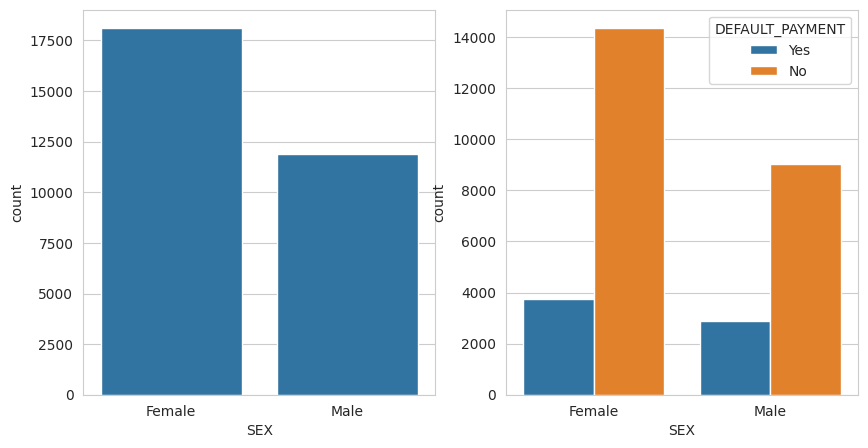

In [20]:
#count plot for Sex in relation to DEFAULT_PAYMENT
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = creditt)
sns.countplot(x = 'SEX', hue = 'DEFAULT_PAYMENT',ax = axes[1], data = creditt)

There are more females credit card holders than male credit card holder in the dataset


In [21]:
creditt['DEFAULT_PAYMENT'].groupby(creditt['SEX']).value_counts(normalize = True)

SEX     DEFAULT_PAYMENT
Female  No                 0.792237
        Yes                0.207763
Male    No                 0.758392
        Yes                0.241608
Name: proportion, dtype: float64



*   from the above, men have a  higher probability of defaulting






MARRIAGE

In [22]:
fil = (creditt['EDUCATION'] == 0) | (creditt['EDUCATION'] == 5) | (creditt['EDUCATION'] == 6) | (creditt['EDUCATION'] == 4)
creditt.loc[fil, 'EDUCATION'] = 'Others'

In [23]:
creditt['EDUCATION'].value_counts()

,count
EDUCATION,
University,14029
Graduate School,10585
High School,4917
Others,468


In [24]:
creditt['DEFAULT_PAYMENT'].groupby(creditt['EDUCATION']).value_counts(normalize = True)

EDUCATION        DEFAULT_PAYMENT
Graduate School  No                 0.807652
                 Yes                0.192348
High School      No                 0.748424
                 Yes                0.251576
Others           No                 0.929487
                 Yes                0.070513
University       No                 0.762706
                 Yes                0.237294
Name: proportion, dtype: float64

<Axes: xlabel='EDUCATION', ylabel='count'>

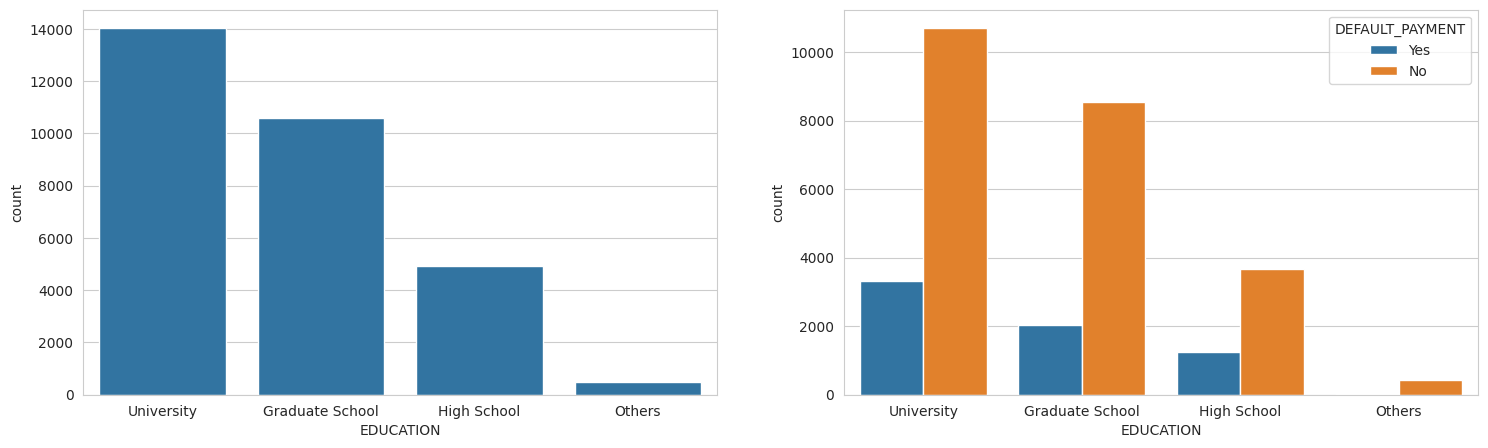

In [25]:

#count plot for EDUCATION in relation to DEFAULT_PAYMENT
fig, axes = plt.subplots(ncols=2,figsize=(18,5))
sns.countplot(x = 'EDUCATION', ax = axes[0], data = creditt)
sns.countplot(x = 'EDUCATION', hue = 'DEFAULT_PAYMENT',ax = axes[1], data = creditt)


*   The use of credit card is the highest among graduates
*   The percentage of defaulting in credit card payment is highest and prominent among credit card users who are still in high school followed by customers in the university



MARRIAGE

In [26]:

#Value counts for marriage
fil = creditt['MARRIAGE']==0
creditt.loc[fil,'MARRIAGE'] = 'Others'
creditt['MARRIAGE'].value_counts()

,count
MARRIAGE,
Single,15964
Married,13658
Others,377


<Axes: xlabel='MARRIAGE', ylabel='count'>

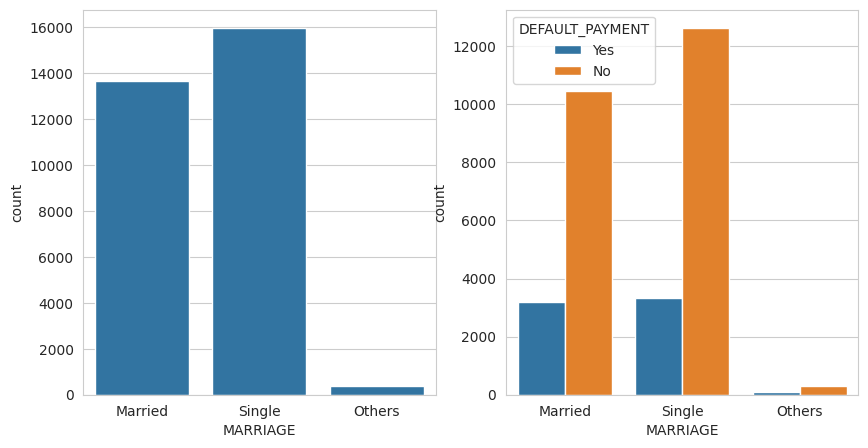

In [27]:
#count plot for MARRIAGE in relation to DEFAULT_PAYMENT
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = creditt)
sns.countplot(x = 'MARRIAGE', hue = 'DEFAULT_PAYMENT',ax = axes[1], data = creditt)



*   Majority of the credit card holders are single and they also have the highest number of defaulters.



COMPARING SEX WITH EDUCATION AND MARITAL STATUS

In [28]:
creditt.groupby(by=['MARRIAGE', 'SEX'])['DEFAULT_PAYMENT'].value_counts(normalize = True)


MARRIAGE  SEX     DEFAULT_PAYMENT
Married   Female  No                 0.780375
                  Yes                0.219625
          Male    No                 0.740798
                  Yes                0.259202
Others    Female  No                 0.797414
                  Yes                0.202586
          Male    No                 0.710345
                  Yes                0.289655
Single    Female  No                 0.802784
                  Yes                0.197216
          Male    No                 0.773386
                  Yes                0.226614
Name: proportion, dtype: float64

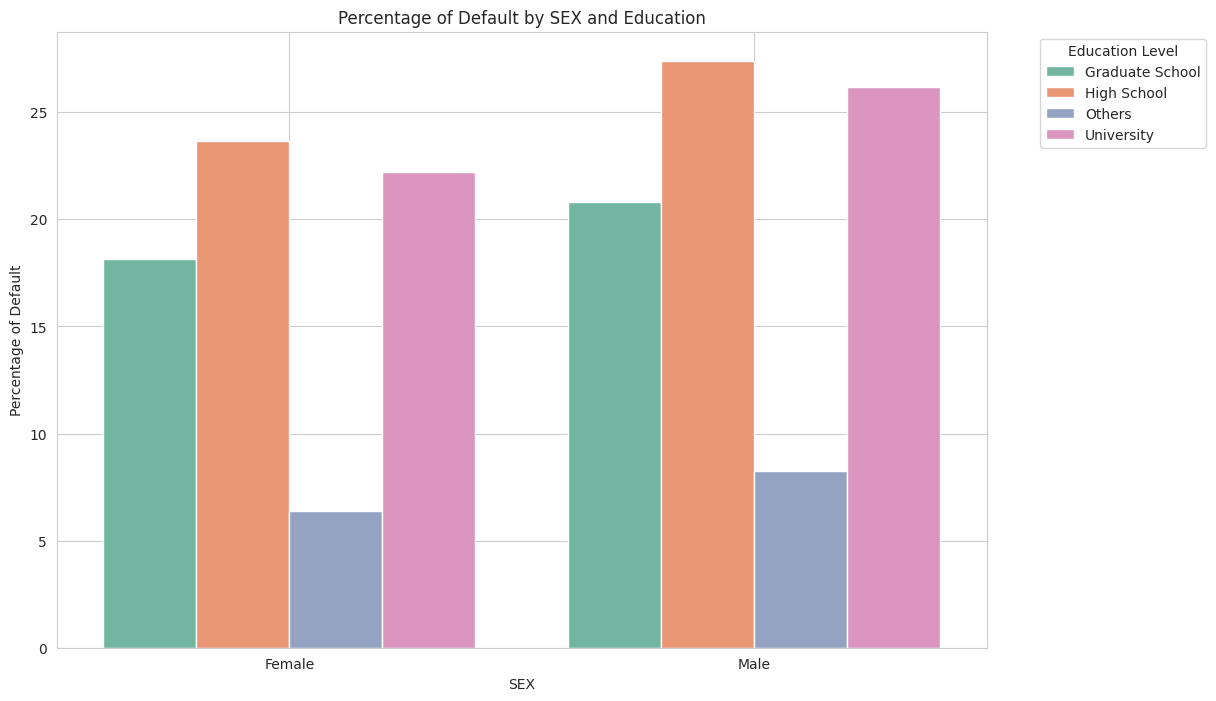

In [29]:
# percentage of defaults
grouped = creditt.groupby(['SEX', 'EDUCATION', 'DEFAULT_PAYMENT']).size().unstack(fill_value=0)
grouped['Total'] = grouped.sum(axis=1)
grouped['Default_Percent'] = grouped['Yes'] / grouped['Total'] * 100
grouped = grouped.reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# bar plot using Seaborn
sns.barplot(data=grouped, x='SEX', y='Default_Percent', hue='EDUCATION', palette='Set2')

# Add labels and title
plt.title('Percentage of Default by SEX and Education')
plt.xlabel('SEX')
plt.ylabel('Percentage of Default')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In all proportion, the percent of default is higher in men than women

AGE

In [30]:
creditt['AGE'].value_counts()

,count
AGE,
29,1605
27,1477
28,1409
30,1395
26,1256
31,1217
25,1186
34,1162
32,1158


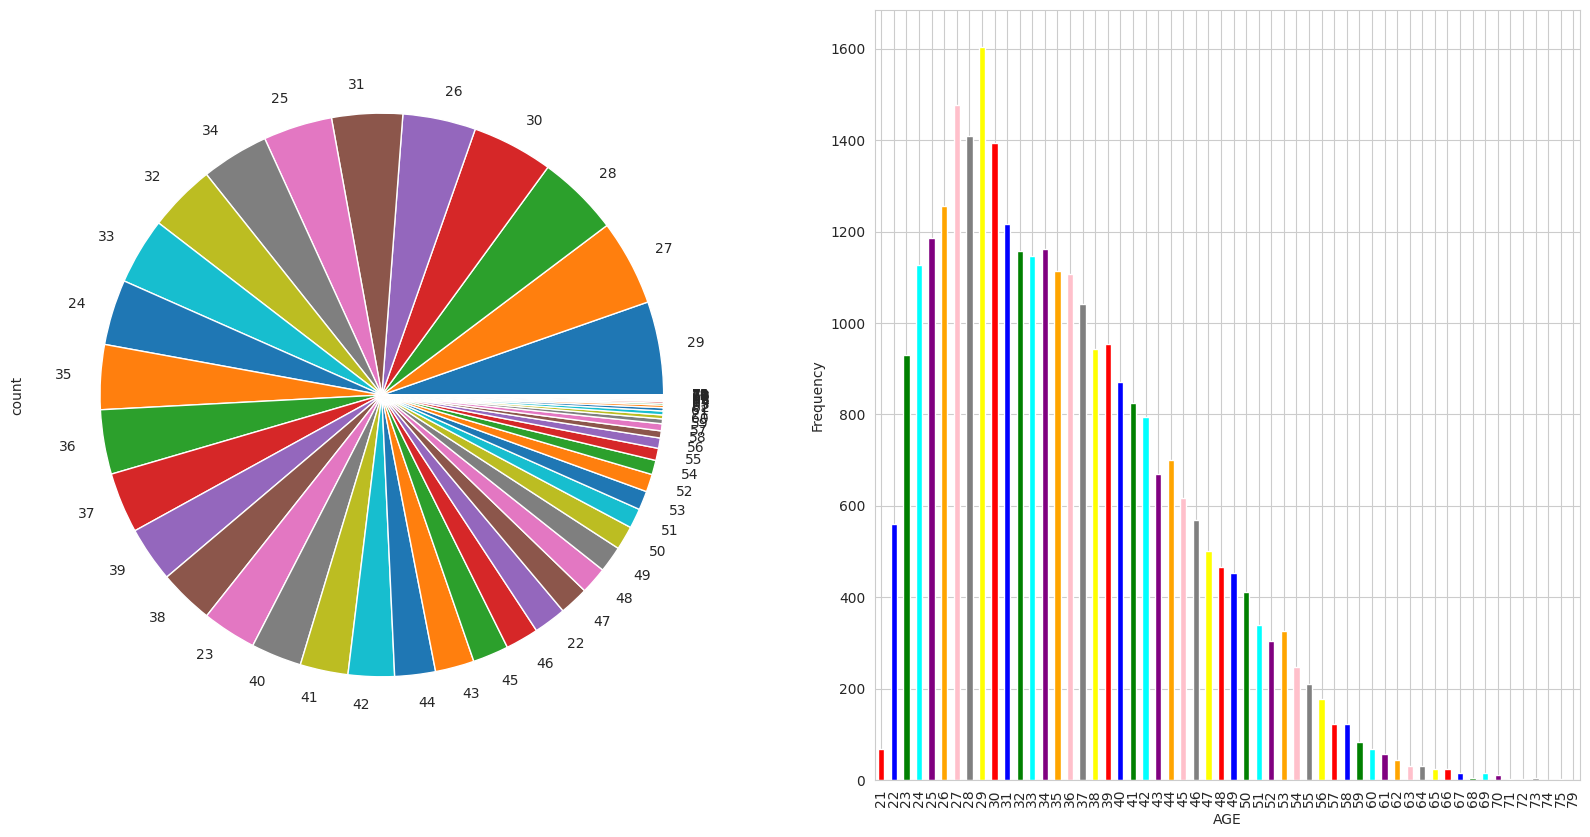

In [31]:
fig, axes = plt.subplots(ncols=2,figsize=(20,10))
Age_counts=creditt['AGE'].value_counts().sort_index()
creditt['AGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
colors=['red','blue','green','cyan','purple','orange','pink','grey','yellow']
Age_counts.plot(kind='bar',color=colors,ax = axes[1])
#plt.hist(creditt['AGE'].dropna(),bins=10,edgecolor='black')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.show()

The distribution is right-skewed meaning the younger customers are more likely to use credit cards

<Axes: xlabel='AGE', ylabel='count'>

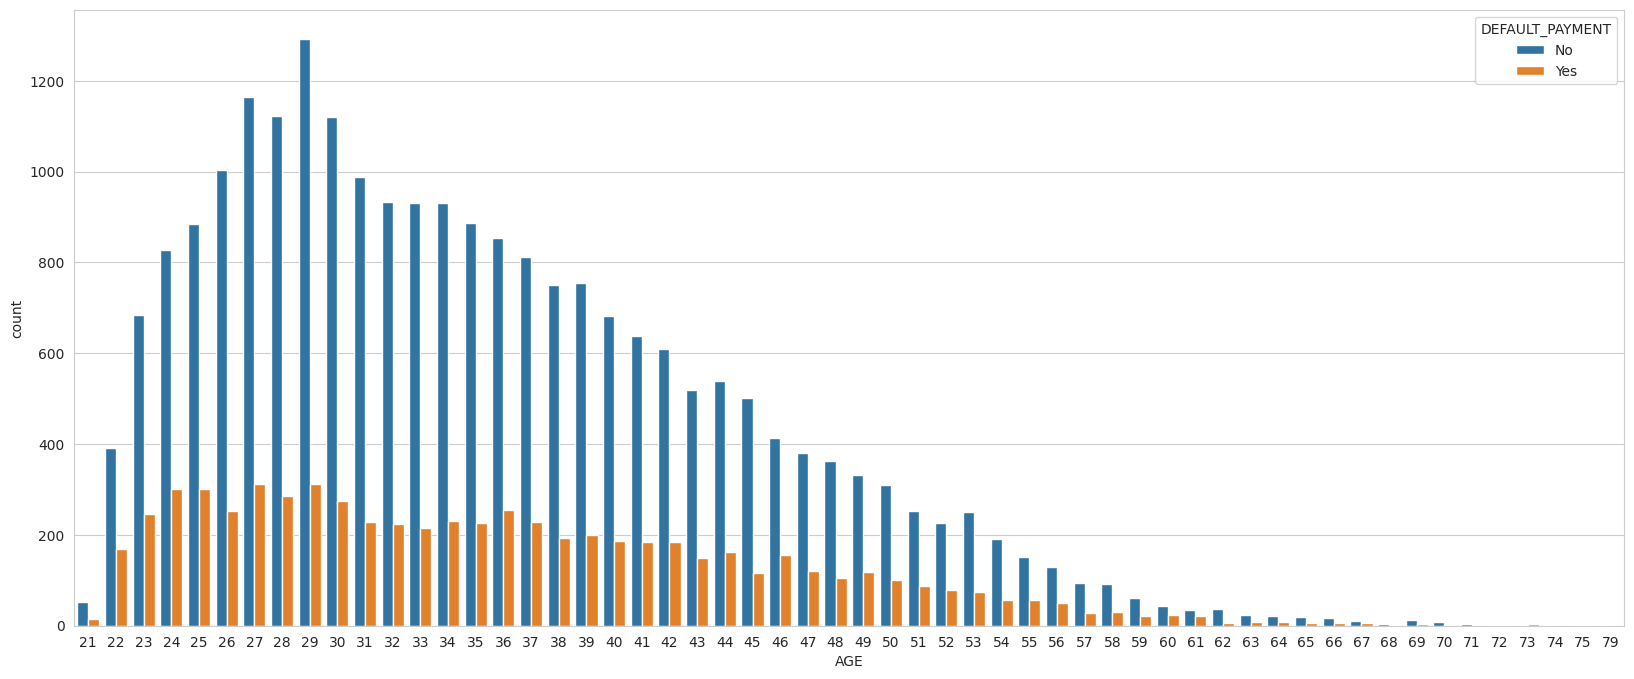

In [32]:
#values count for Age with respect to DEFAULT_PAYMENT
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'DEFAULT_PAYMENT', data = creditt)



1. The main clients are in their 30s  
2. Customers in their 30s have the highest non-default in the dataset





In [33]:
creditt.groupby('DEFAULT_PAYMENT')['AGE'].mean()

,AGE
DEFAULT_PAYMENT,
No,35.417266
Yes,35.724190


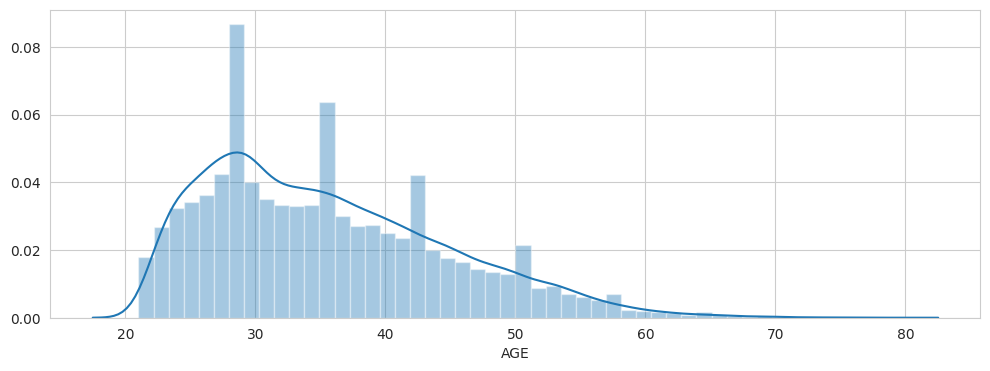

In [34]:
plt.figure(figsize=(12,4))

sns.distplot(creditt['AGE'])
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

In [35]:
creditt['AgeBin'] = pd.cut(creditt['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
print(creditt['AgeBin'].value_counts())

AgeBin
(25, 30]    7142
(40, 50]    6004
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
Name: count, dtype: int64


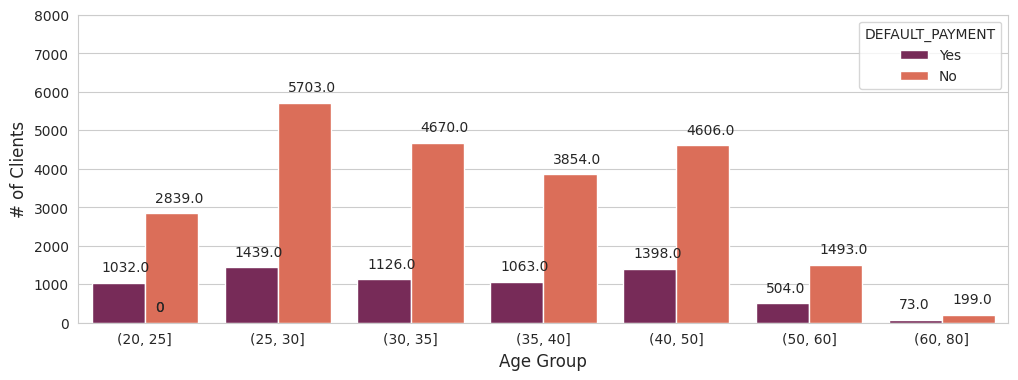

In [36]:
plt.figure(figsize=(12,4))

creditt['AgeBin'] = creditt['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

ax = sns.countplot(data = creditt, x = 'AgeBin', hue="DEFAULT_PAYMENT", palette = 'rocket', order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,8000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()



*   Most credit card holders in the dataset are between the age 25-30
*   Age group 60-80 form the minority group for credit card holder in the dataset



# LIMIT_BAL

In [37]:
creditt['LimitBin'] = pd.cut(creditt['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
creditt['LimitBin'].value_counts()

,count
LimitBin,
"(5000, 50000]",7675
"(200000, 300000]",5059
"(50000, 100000]",4822
"(150000, 200000]",3978
"(100000, 150000]",3902
"(300000, 400000]",2759
"(400000, 500000]",1598
"(500000, 1100000]",206


In [38]:
import pandas as pd

data = {
    'LimitBin': [
        '(5000, 50000]', '(200000, 300000]', '(50000, 100000]',
        '(150000, 200000]', '(100000, 150000]', '(300000, 400000]',
        '(400000, 500000]', '(500000, 1100000]'
    ],
    'Count': [7675, 5059, 4822, 3978, 3902, 2759, 1598, 206]
}

# DataFrame
df = pd.DataFrame(data)

#total count
total_count = df['Count'].sum()

# percentage for each bin
df['Percentage'] = (df['Count'] / total_count) * 100

# Display the DataFrame with percentages
df

,LimitBin,Count,Percentage
0,"(5000, 50000]",7675,25.584186
1,"(200000, 300000]",5059,16.863895
2,"(50000, 100000]",4822,16.073869
3,"(150000, 200000]",3978,13.260442
4,"(100000, 150000]",3902,13.007100
5,"(300000, 400000]",2759,9.196973
6,"(400000, 500000]",1598,5.326844
7,"(500000, 1100000]",206,0.686690




*  25.58% of the customer population has falls within the category of the lowest credit limit - 5000 - 50000
*   0.68% of the customers population  falls within category of the highest credit limit - 500000 - 1100000



 credit limit grouped by DEFAULT_PAYMENT

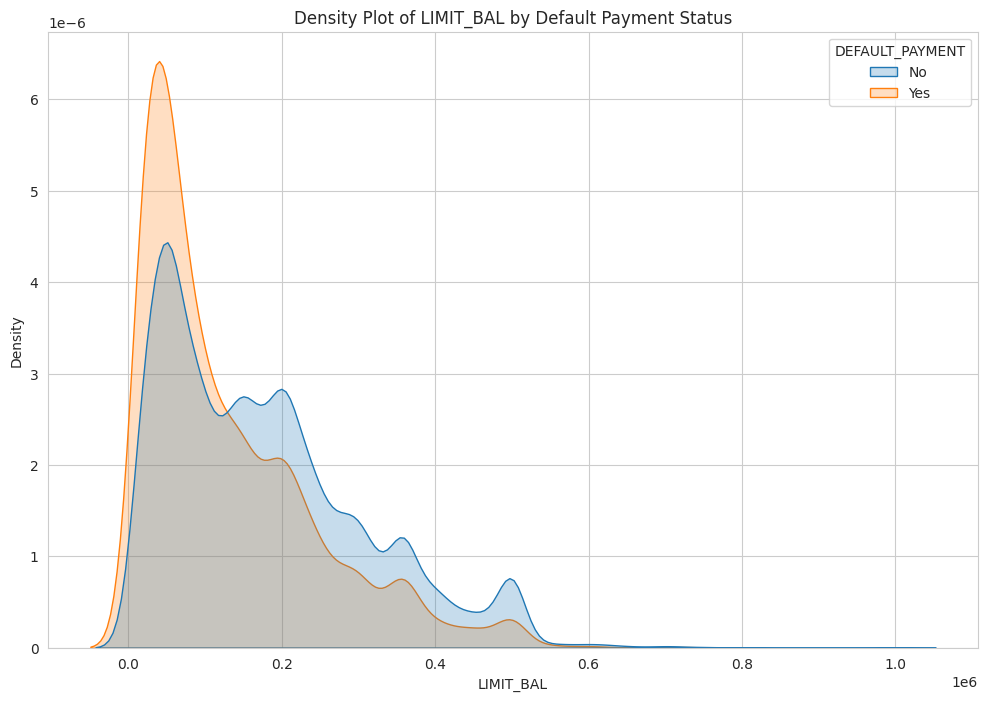

In [39]:
creditt['DEFAULT_PAYMENT'] = creditt['DEFAULT_PAYMENT'].astype('category')

# Plotting
plt.figure(figsize=(12, 8))

# density plot using Seaborn with hue
sns.kdeplot(data=creditt, x='LIMIT_BAL', hue='DEFAULT_PAYMENT', fill=True, common_norm=False)

#  label
#handles, labels = plt.gca().get_legend_handles_labels()
#plt.legend(handles=handles, labels=[f'DEFAULT_PAYMENT= {label}' for label in labels], title='Default Payment Status')


plt.title('Density Plot of LIMIT_BAL by Default Payment Status')
plt.xlabel('LIMIT_BAL')
plt.ylabel('Density')
plt.grid(True)
plt.show()

.

*  Most of defaults are for credit limits 0-100,000 (and density for this interval is larger for defaults than for non-defaults)

*   Larger defaults number are for the amounts of 50,000, 20,000 and 30,000.


 **LIMIT_BAL + Demographic Features**

In [40]:
creditt.groupby('SEX')['LIMIT_BAL'].mean()

,LIMIT_BAL
SEX,
Female,170086.462014
Male,163529.374947


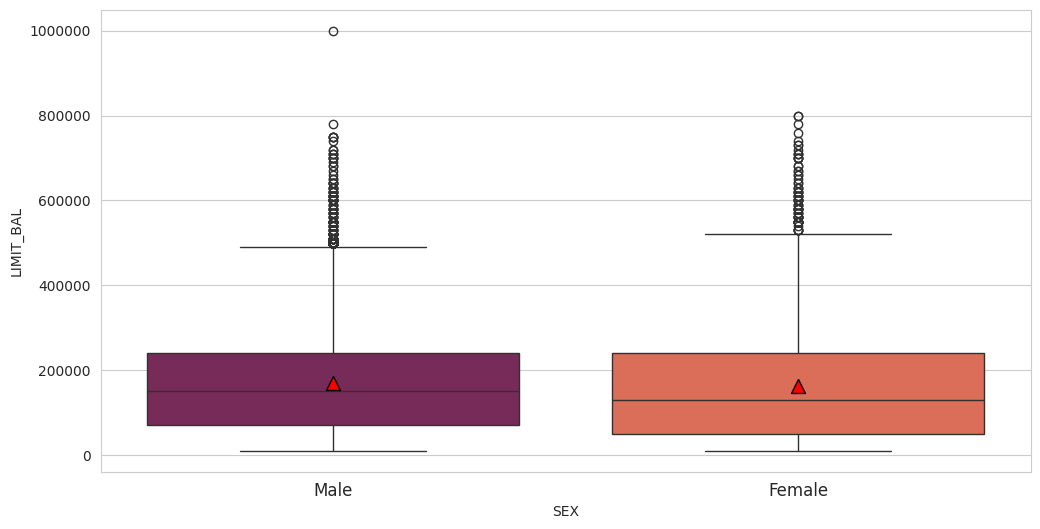

In [41]:
plt.figure(figsize=(12,6))

sns.boxplot(x = "SEX", y = "LIMIT_BAL",data = creditt, palette = 'rocket', showmeans=True,
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

plt.show()

In [42]:
creditt.groupby('EDUCATION')['LIMIT_BAL'].mean()

,LIMIT_BAL
EDUCATION,
Graduate School,212956.069910
High School,126550.270490
Others,181316.239316
University,147069.356333


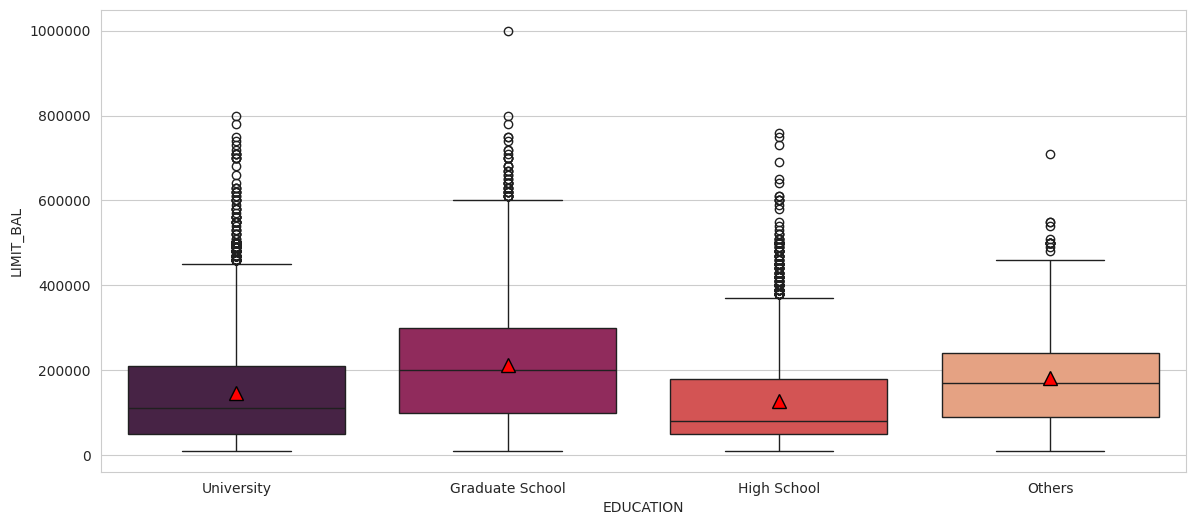

In [43]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL", data = creditt, palette = 'rocket', showmeans=True,
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation
plt.show()

In [44]:
creditt.groupby('MARRIAGE')['LIMIT_BAL'].mean()

,LIMIT_BAL
MARRIAGE,
Married,182210.572558
Others,103076.923077
Single,156413.660737


Married customers have the highest credit limit

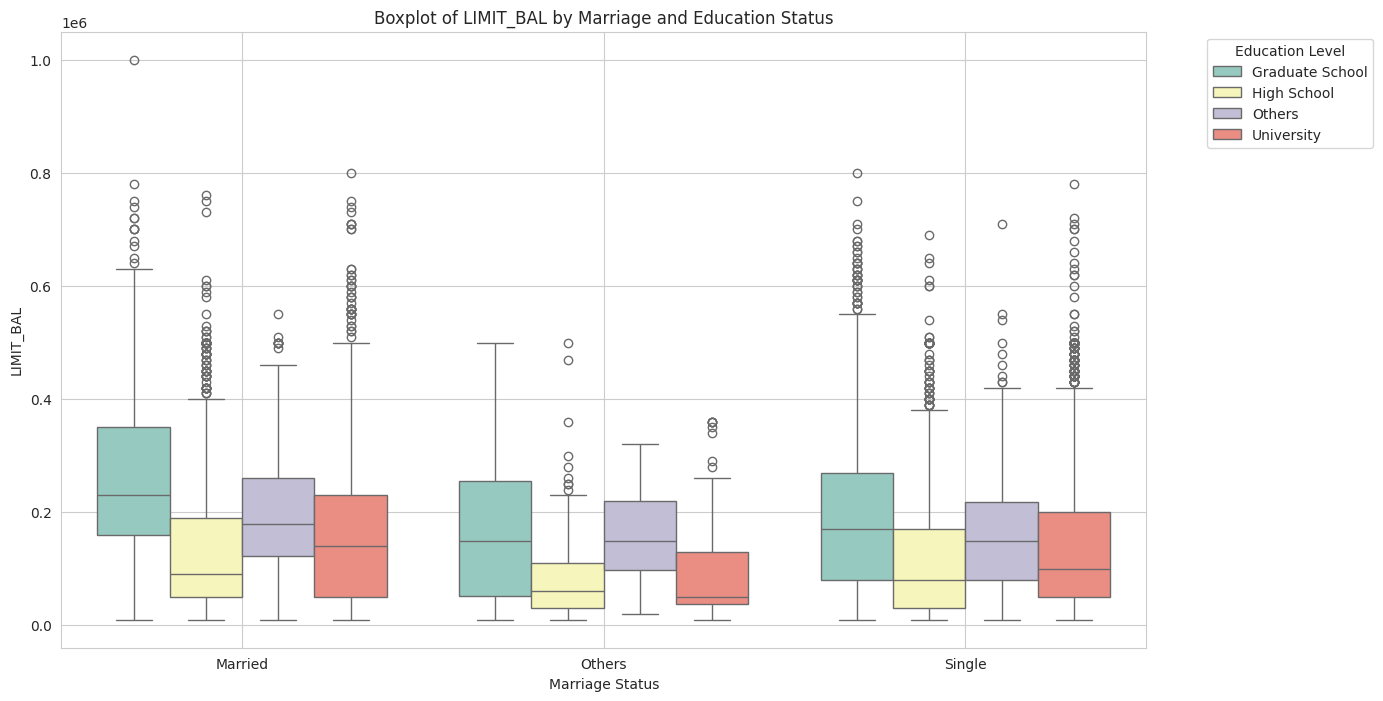

In [45]:
creditt['MARRIAGE'] = creditt['MARRIAGE'].astype('category')
creditt['EDUCATION'] = creditt['EDUCATION'].astype('category')

# Plotting
plt.figure(figsize=(14, 8))

# boxplot using Seaborn
sns.boxplot(data=creditt, x='MARRIAGE', y='LIMIT_BAL', hue='EDUCATION', palette='Set3')

# labels and title
plt.title('Boxplot of LIMIT_BAL by Marriage and Education Status')
plt.xlabel('Marriage Status')
plt.ylabel('LIMIT_BAL')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

The graph shows that


*   customers who are in high school but are neither married or single have the lowest limit_bal in the dataset  




In [46]:
creditt.groupby('AgeBin')['LIMIT_BAL'].mean()

,LIMIT_BAL
AgeBin,
"(20, 25]",73763.885301
"(25, 30]",164320.918510
"(30, 35]",197688.060732
"(35, 40]",196780.557250
"(40, 50]",179701.812125
"(50, 60]",159349.023535
"(60, 80]",201617.647059


In [47]:
creditt.groupby(by=['AgeBin', 'SEX'])['DEFAULT_PAYMENT'].value_counts(normalize = True)

AgeBin    SEX     DEFAULT_PAYMENT
(20, 25]  Female  No                 0.744642
                  Yes                0.255358
          Male    No                 0.707296
                  Yes                0.292704
(25, 30]  Female  No                 0.805823
                  Yes                0.194177
          Male    No                 0.786328
                  Yes                0.213672
(30, 35]  Female  No                 0.821336
                  Yes                0.178664
          Male    No                 0.782157
                  Yes                0.217843
(35, 40]  Female  No                 0.806846
                  Yes                0.193154
          Male    No                 0.751704
                  Yes                0.248296
(40, 50]  Female  No                 0.780281
                  Yes                0.219719
          Male    No                 0.749807
                  Yes                0.250193
(50, 60]  Female  No                 0.768571
                  Yes                0.231429
          Male    No                 0.724393
                  Yes                0.275607
(60, 80]  Female  No                 0.715447
                  Yes                0.284553
          Male    No                 0.744966
                  Yes                0.255034
Name: proportion, dtype: float64

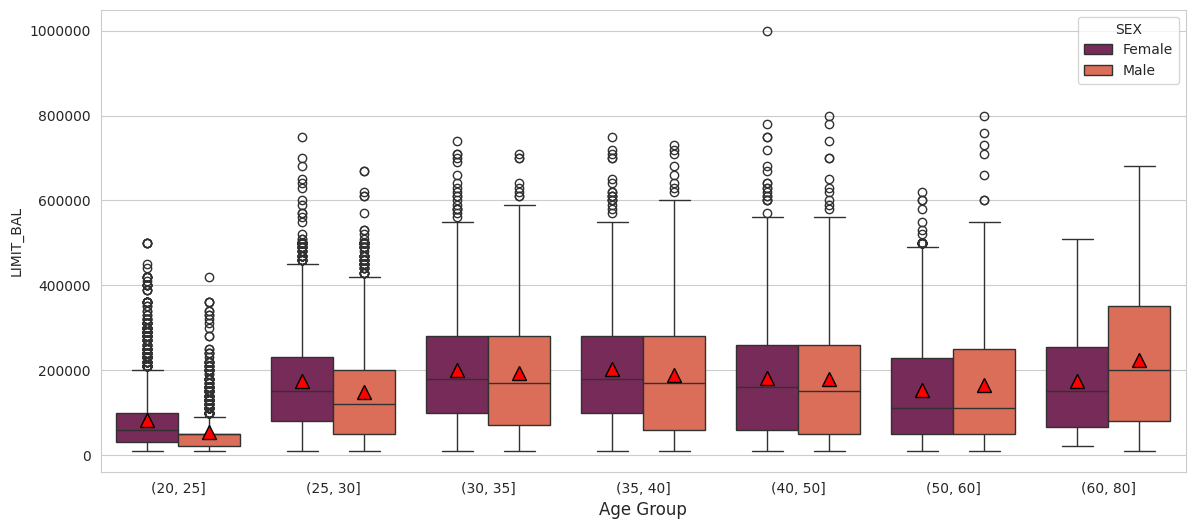

In [48]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "AgeBin", y = "LIMIT_BAL",hue='SEX', data = creditt, palette = 'rocket', order = AgeBin_order, showmeans=True,
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation
plt.xlabel("Age Group", fontsize= 12)

plt.show()




*   Males within Age group 60-80 has the highest credit limit





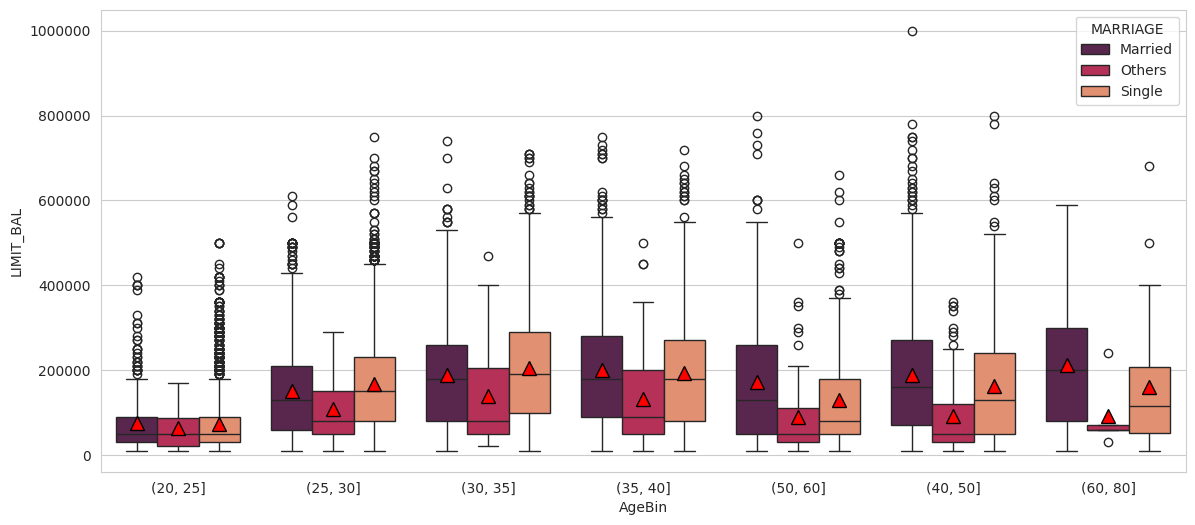

In [49]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "AgeBin", y = "LIMIT_BAL", hue = 'MARRIAGE', data = creditt, palette = 'rocket', showmeans=True,
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation)

plt.show()



*    Customers Age group 60,80 who are married has the highest credit limit
*   customers within age group 60 -80 that are neither single or married  has  zero credit limit in the entire dataset




in general:


*   Male custoers who are between the age group 20 - 25 single as well as has high school as their education level have the highest percentage of defaulting on their credit card
  

*   customers between the age- group of 60 - 80 who are neither married or single and have high school  educational level have no credit card



*   Married females within the age group 30 -35 whose educational level is fradute school have the highest percentage of not defaulting on their credit card







Repayment

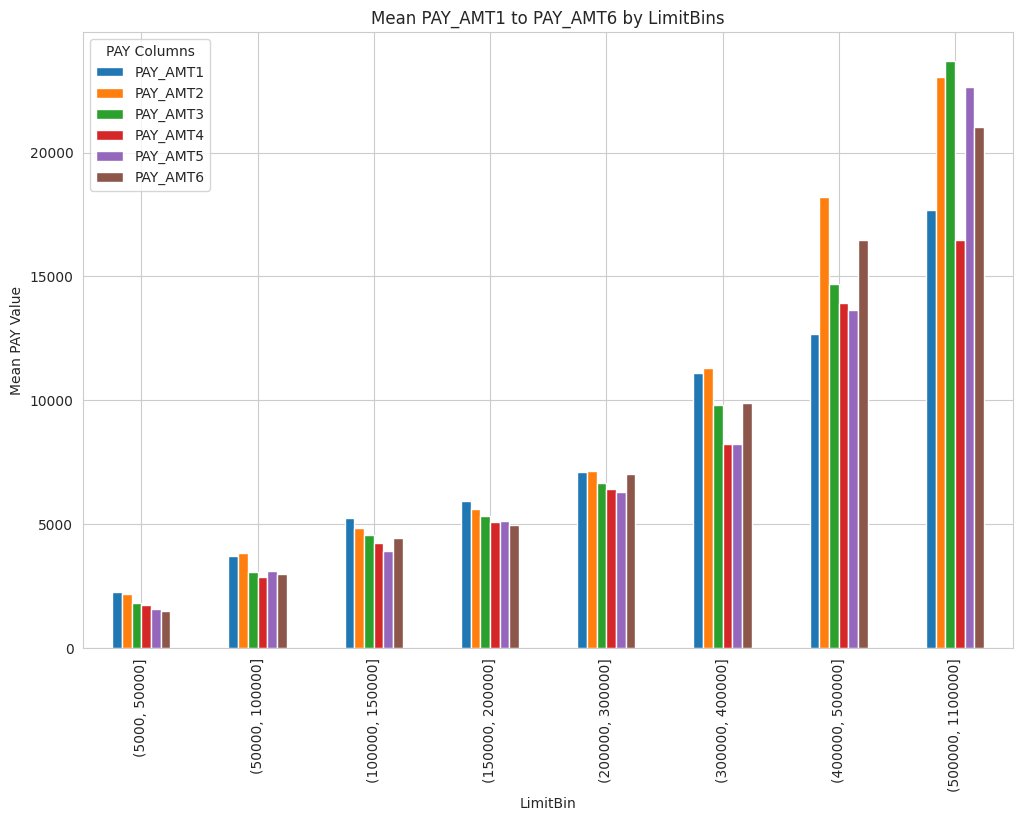

In [50]:
pay_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
pay_means = creditt.groupby('LimitBin')[pay_columns].mean()

# Plotting
pay_means.plot(kind='bar', figsize=(12, 8))
plt.title('Mean PAY_AMT1 to PAY_AMT6 by LimitBins')
plt.xlabel('LimitBin')
plt.ylabel('Mean PAY Value')
plt.legend(title='PAY Columns')
plt.show()



*   average Payments received in july 2005 was the highest payment received between april 2005 to september 2005.
* the average lowest payment was received in september 2005.



Monthly payment status

In [51]:
creditt_melted = creditt.melt(id_vars='DEFAULT_PAYMENT', value_vars=['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],
                    var_name='Payment', value_name='Value')

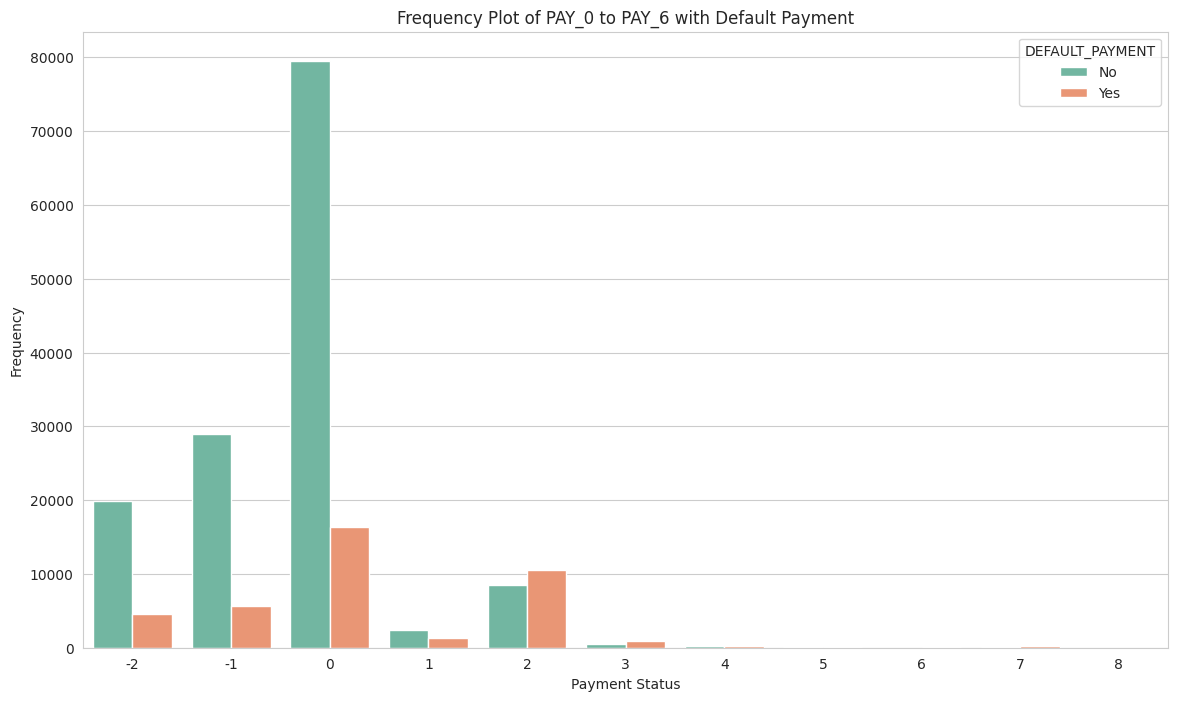

In [52]:
plt.figure(figsize=(14, 8))  # Set the size of the plot
sns.countplot(data=creditt_melted, x='Value', hue='DEFAULT_PAYMENT', palette='Set2')
plt.title('Frequency Plot of PAY_0 to PAY_6 with Default Payment')
plt.xlabel('Payment Status')
plt.ylabel('Frequency')
plt.show()

The graph shows that customers who pay on time or early are much less likely to default, while those who are late by even a month or two have a higher risk of defaulting.indicaing that there is a strong correlation between the payment timeline and default risk

Bill Amount

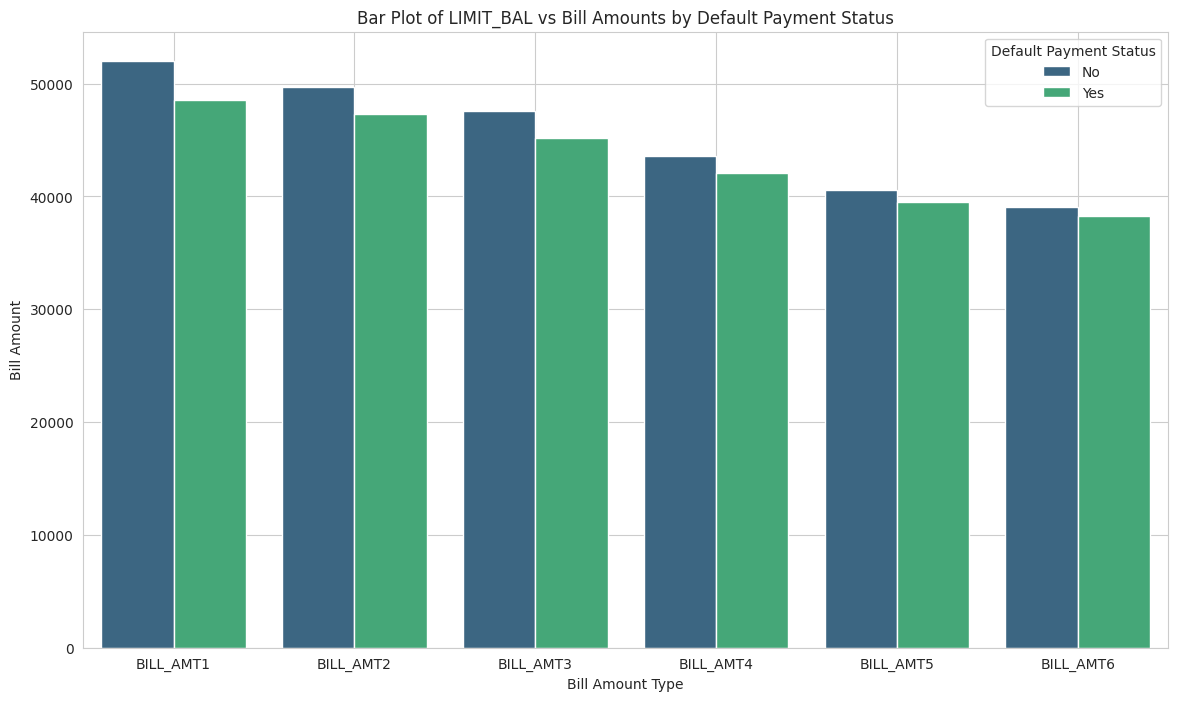

In [53]:
creditt_long = pd.melt(creditt, id_vars=['LIMIT_BAL', 'DEFAULT_PAYMENT'],
                  value_vars=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],
                  var_name='Bill_Type', value_name='Bill_Amount')


plt.figure(figsize=(14, 8))

# bar plot using Seaborn with hue
sns.barplot(data=creditt_long, x='Bill_Type', y='Bill_Amount', hue='DEFAULT_PAYMENT', ci=None, palette='viridis')

# labels and title
plt.title('Bar Plot of LIMIT_BAL vs Bill Amounts by Default Payment Status')
plt.xlabel('Bill Amount Type')
plt.ylabel('Bill Amount')
plt.legend(title='Default Payment Status')
plt.grid(True)
plt.show()

Bills in september 2005 was the highest between April 2005 to September 2005 with steady increase in the rate of  default as well as non-default from April 2005 to September 2005

CHECK MULTICOLINEARITY

In [54]:
creditt = pd.read_csv(file_path)

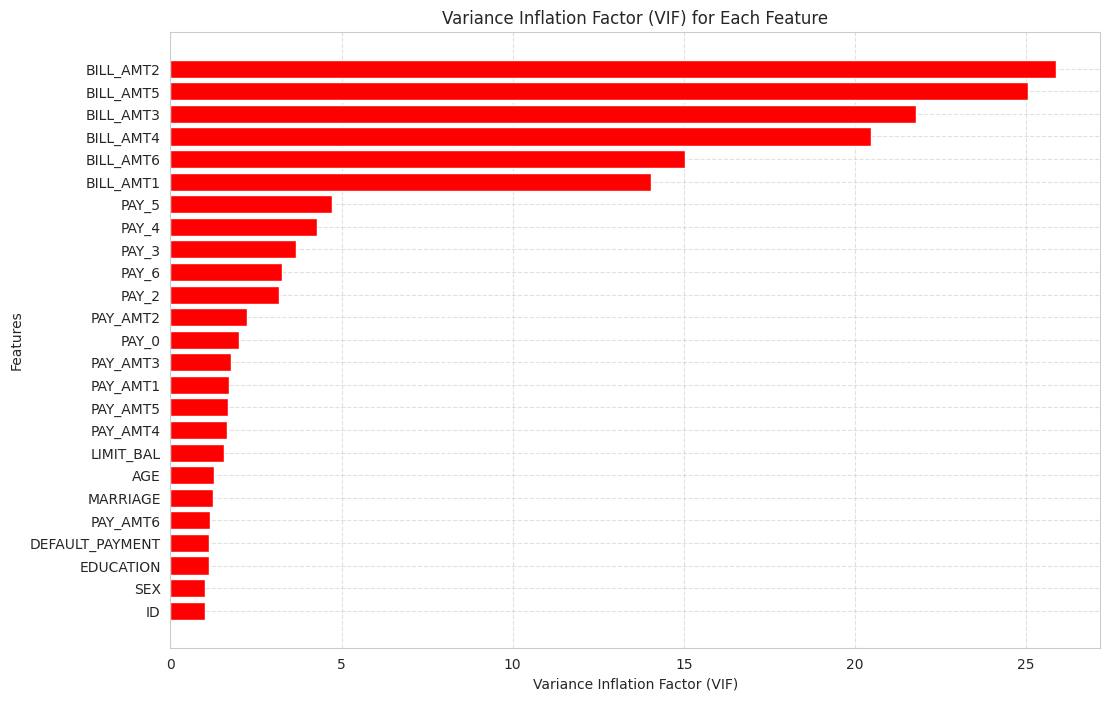

In [55]:
# Data: Features and their corresponding VIF values
data = {
    'Feature': ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
                'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT_PAYMENT'],
    'VIF': [1.014594, 1.559687, 1.024603, 1.128696, 1.231613, 1.276242, 1.997889, 3.177986,
            3.660189, 4.293119, 4.729305, 3.256204, 14.046672, 25.874386, 21.776035,
            20.452669, 25.063842, 15.025918, 1.708871, 2.237962, 1.757209, 1.650888,
            1.688307, 1.170091, 1.141575]
}


vif_df = pd.DataFrame(data)

# VIF values
vif_df = vif_df.sort_values(by='VIF', ascending=False)

# Plotting the VIF values
plt.figure(figsize=(12, 8))
plt.barh(vif_df['Feature'], vif_df['VIF'], color='red')
plt.xlabel('Variance Inflation Factor (VIF)')
plt.ylabel('Features')
plt.title('Variance Inflation Factor (VIF) for Each Feature')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest VIF on top
plt.grid(True, linestyle='--', alpha=0.6)


plt.show()

it can be seen that BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5 have high colinr=ear values and as such will be dropped from the dataset.

In [56]:
creditt.drop(columns=['ID', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5'], inplace=True)

In [57]:
creditt.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

above are the features selected and not dropped

CORRELATION

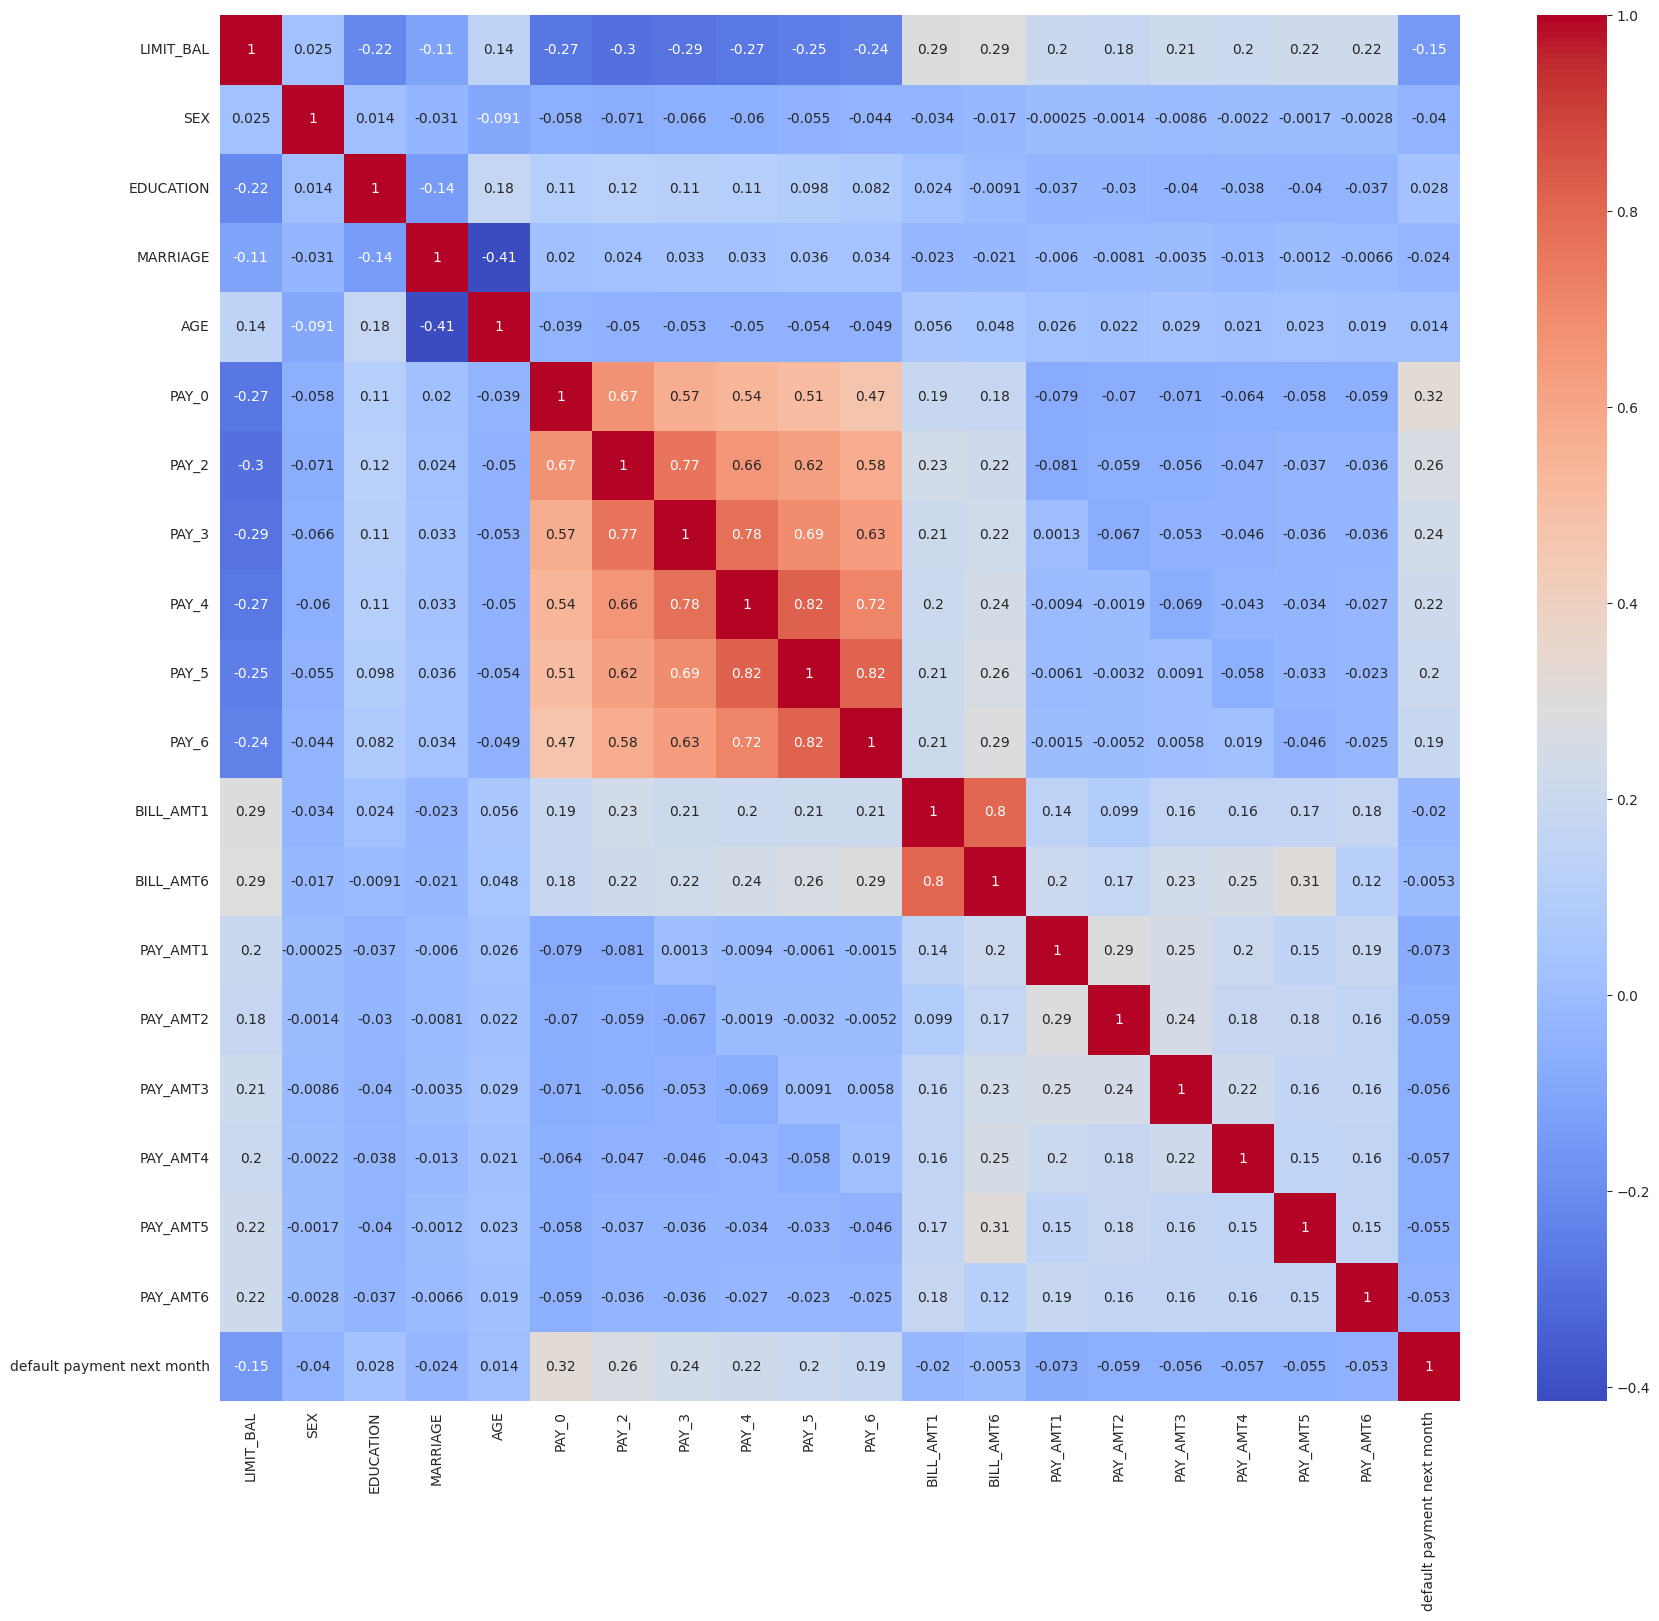

In [58]:
plt.figure(figsize=(20,18))
sns.heatmap(creditt.corr(),annot=True,cmap="coolwarm")
plt.show()

The correlation matrix shows that there is little to no correlation between different features. with the highest correlation value between two different features at the range of 0.2 - 0.4

HANDLING OUTLIERS using IQR

In [59]:
continuous_cols = ['PAY_0','PAY_2','PAY_4', 'PAY_5','PAY_6', 'PAY_3','BILL_AMT1','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

In [60]:
Q1 = creditt[continuous_cols].quantile(0.25)
Q3 = creditt[continuous_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((creditt[continuous_cols] < (Q1 - 1.5 * IQR)) | (creditt[continuous_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

In [61]:
# Remove outliers
creditt1 = creditt[~outliers].reset_index(drop=True)

In [62]:
creditt1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,90000,2,2,2,34,0,0,0,0,0,0,29239,15549,1518,1500,1000,1000,1000,5000,0
1,50000,2,2,1,37,0,0,0,0,0,0,46990,29547,2000,2019,1200,1100,1069,1000,0
2,50000,1,1,2,37,0,0,0,0,0,0,64400,20024,2500,1815,657,1000,1000,800,0
3,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,567,380,601,0,581,1687,1542,0
4,630000,2,2,2,41,-1,0,-1,-1,-1,-1,12137,2870,1000,6500,6500,6500,2870,0,0


DATA STANDARDISATION

In [63]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
X, y = make_classification(n_samples=48000, n_features=20, n_informative=2, n_redundant=10,
                           n_clusters_per_class=1, weights=[0.8, 0.2], flip_y=0, random_state=42)


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

DATA TRANSFORMATION USING PRICIPAL COMPONENT ANALYSIS(PCA)

In [65]:
# Applying PCA to reduce dimensionality
pca = PCA(n_components=19)
X_pca = pca.fit_transform(X_scale)

In [66]:
X_pca

array([[ 2.42941171e+00,  1.02475569e-01,  1.57265100e+00, ...,
         3.38505417e-16,  6.45764201e-16,  2.26191526e-16],
       [ 1.74684023e+00,  8.77319998e-01, -7.70964021e-01, ...,
         2.53789832e-16, -1.95167034e-16,  4.16777818e-16],
       [-1.54235775e+00, -2.01542023e+00, -3.17152649e-01, ...,
        -2.39577266e-16, -3.30711700e-16,  4.08610925e-16],
       ...,
       [ 9.44077765e-01, -6.06829592e-01,  3.35142900e-01, ...,
        -1.84515546e-16,  2.54122795e-16,  2.82685661e-17],
       [ 1.33227914e+00,  1.72208357e+00,  6.06033732e-02, ...,
         9.56923889e-17, -7.78277882e-17,  2.89577884e-16],
       [ 7.18862129e-01, -6.18547270e-01, -6.05836329e-02, ...,
         1.24345954e-16, -3.91573243e-16,  4.64348713e-16]])

DATA BALANCING  using SMOTE





In [67]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# fitting predictor and target variable
#X_smote, y_smote = smote.fit_resample(creditt.iloc[:,0:-1], creditt['DEFAULT_PAYMENT'])
X_smote, y_smote = smote.fit_resample(X_pca,  y)
#X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', len(creditt))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 29999
Resampled dataset shape 76800


In [68]:
X_smote

array([[ 2.42941171e+00,  1.02475569e-01,  1.57265100e+00, ...,
         3.38505417e-16,  6.45764201e-16,  2.26191526e-16],
       [ 1.74684023e+00,  8.77319998e-01, -7.70964021e-01, ...,
         2.53789832e-16, -1.95167034e-16,  4.16777818e-16],
       [-1.54235775e+00, -2.01542023e+00, -3.17152649e-01, ...,
        -2.39577266e-16, -3.30711700e-16,  4.08610925e-16],
       ...,
       [-6.76489284e+00,  2.11458992e-01, -4.15678790e-01, ...,
         5.65862403e-16,  6.45841012e-17, -4.29188140e-16],
       [-5.25404643e+00, -1.11415316e+00, -1.68446545e+00, ...,
        -1.59467095e-16, -3.95949919e-16, -3.75869403e-16],
       [-4.19033965e+00, -1.24257871e+00,  1.79669425e-01, ...,
        -1.06913163e-16,  3.03726406e-16, -2.58268767e-16]])

In [69]:
y_smote.shape

(76800,)

In [70]:
columns = list(creditt1.columns)

In [71]:
columns.pop()

'default payment next month'

In [72]:
balancedr = pd.DataFrame(X_smote, columns=columns)

In [73]:
balancedr.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2.429412,0.102476,1.572651,-0.173543,-1.780640,0.252642,-2.595633,-1.139847,-0.395881,-0.348189,-6.747575e-17,-2.520499e-16,3.575868e-16,-5.998965e-16,1.937085e-16,-2.344146e-16,3.385054e-16,6.457642e-16,2.261915e-16
1,1.746840,0.877320,-0.770964,-0.219406,-0.949367,2.142983,0.282465,1.051484,-0.843514,0.064914,-1.741849e-16,-2.327730e-16,3.870599e-16,2.237391e-16,1.502694e-16,-2.041116e-16,2.537898e-16,-1.951670e-16,4.167778e-16
2,-1.542358,-2.015420,-0.317153,0.376522,1.216865,0.542801,0.355154,0.932195,-1.727748,-0.711480,-1.965510e-16,1.574791e-16,-2.294655e-16,2.579755e-16,-2.529181e-16,-1.854634e-17,-2.395773e-16,-3.307117e-16,4.086109e-16
3,1.176750,-1.261416,-0.188585,1.028942,-1.064151,0.620332,0.487053,-0.299104,-0.863202,-1.064822,-2.581642e-16,-2.845312e-16,-1.332910e-16,4.352222e-16,-6.621503e-17,-3.383534e-16,2.100669e-17,2.348469e-16,4.610063e-16
4,2.246641,0.796269,0.619413,0.285606,-0.561902,0.178322,0.582140,-0.603861,-1.574217,1.823022,3.351297e-16,6.481815e-17,6.757209e-16,8.132436e-16,4.636610e-16,2.239162e-16,3.900827e-16,2.756459e-16,-2.557490e-16


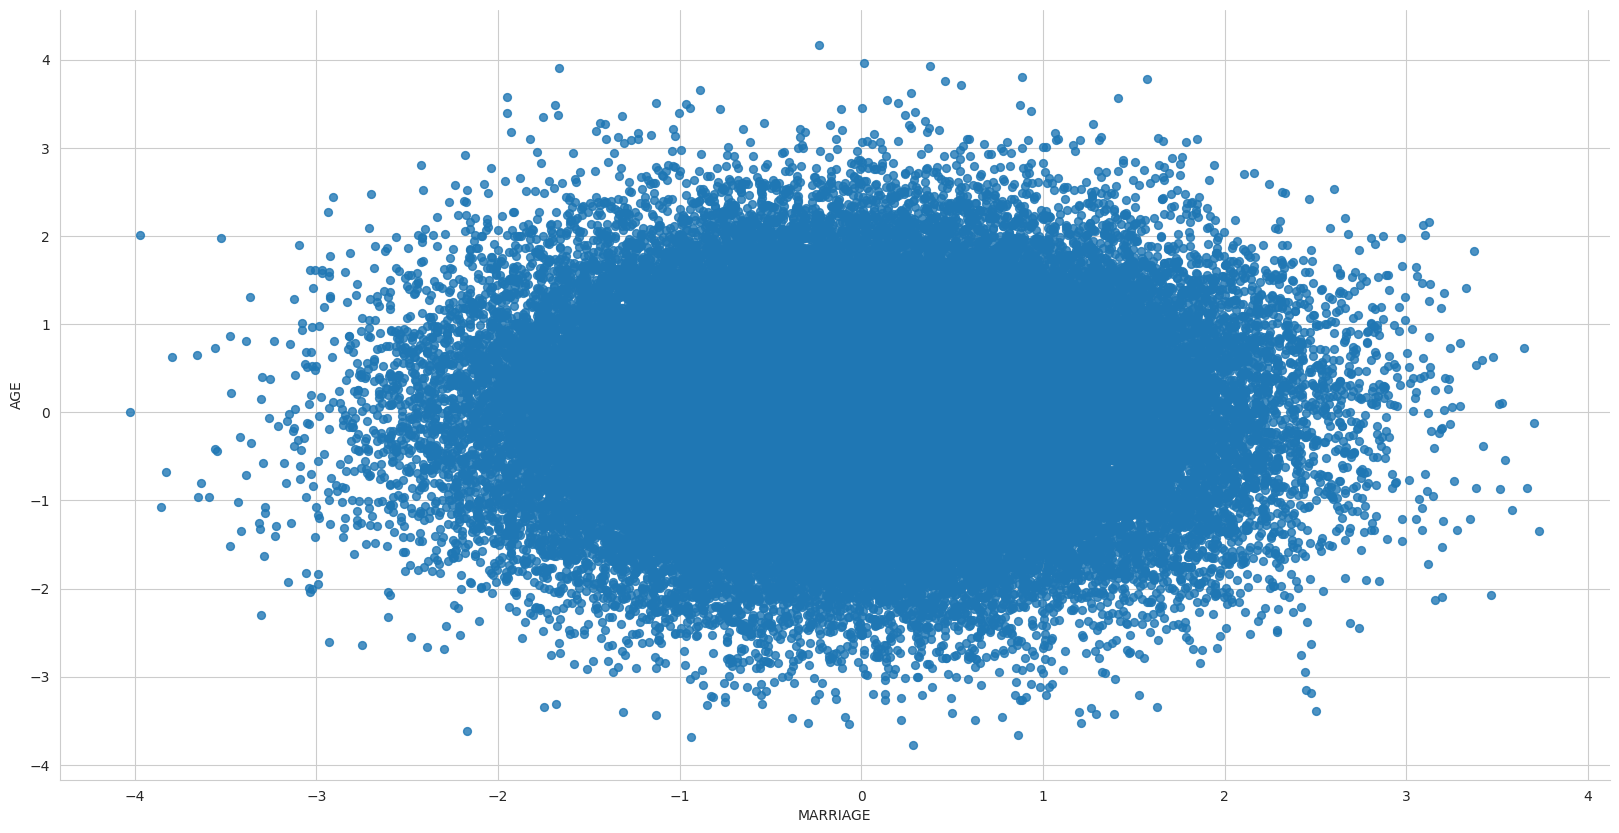

In [74]:
# @title MARRIAGE vs AGE

from matplotlib import pyplot as plt
balancedr.plot(kind='scatter', x='MARRIAGE', y='AGE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

balanced scatter plot distribution between AGE versus SEX

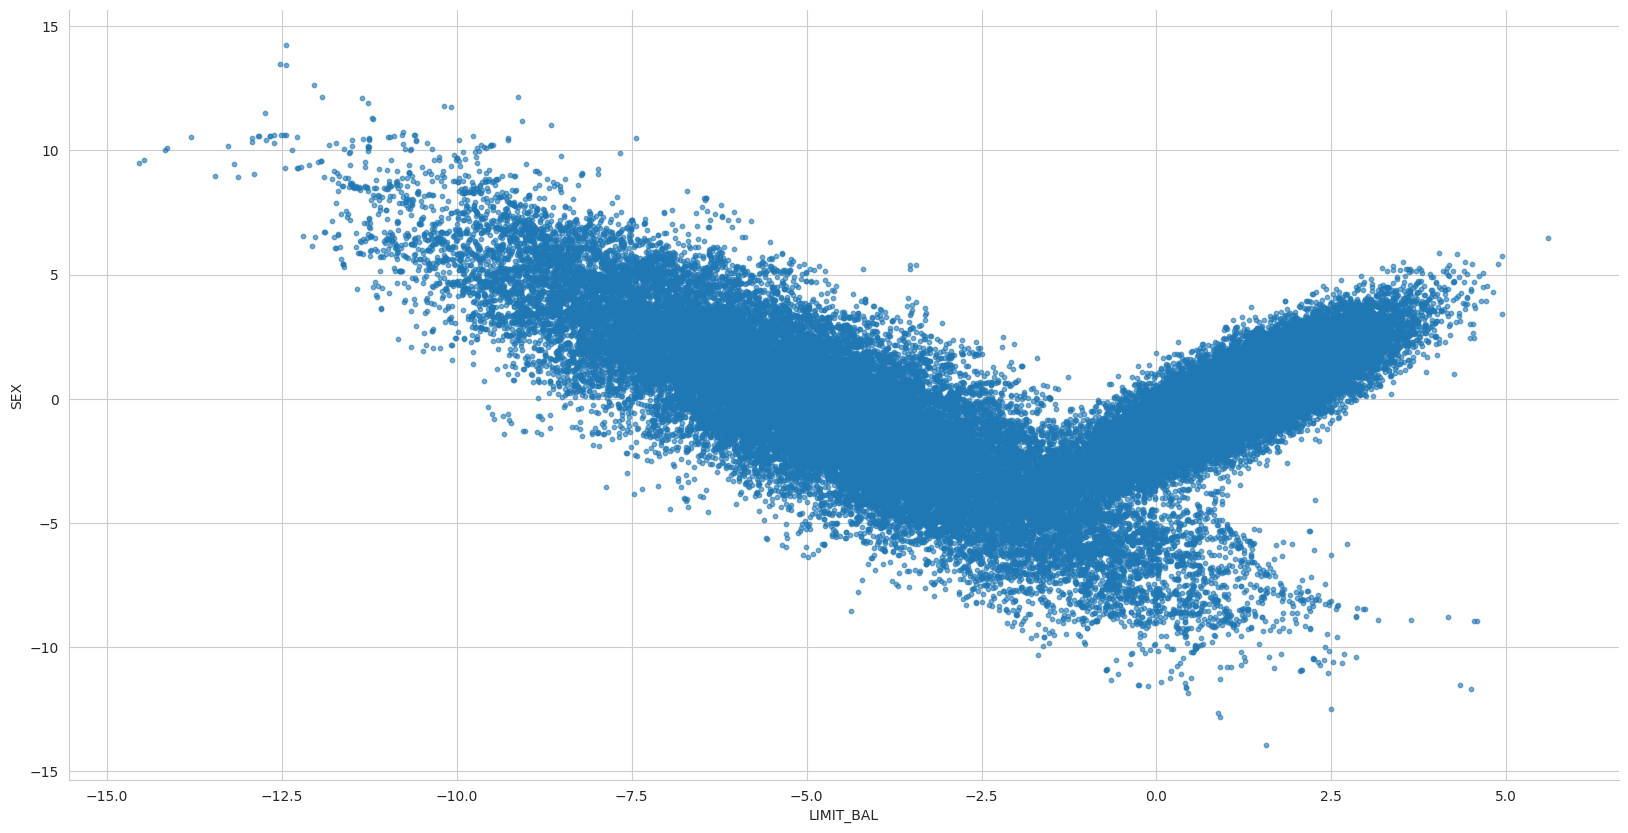

In [75]:
# @title LIMIT_BAL vs SEX

from matplotlib import pyplot as plt
balancedr.plot(kind='scatter', x='LIMIT_BAL', y='SEX', s=10, alpha=.6)
plt.gca().spines[['top', 'right',]].set_visible(False)

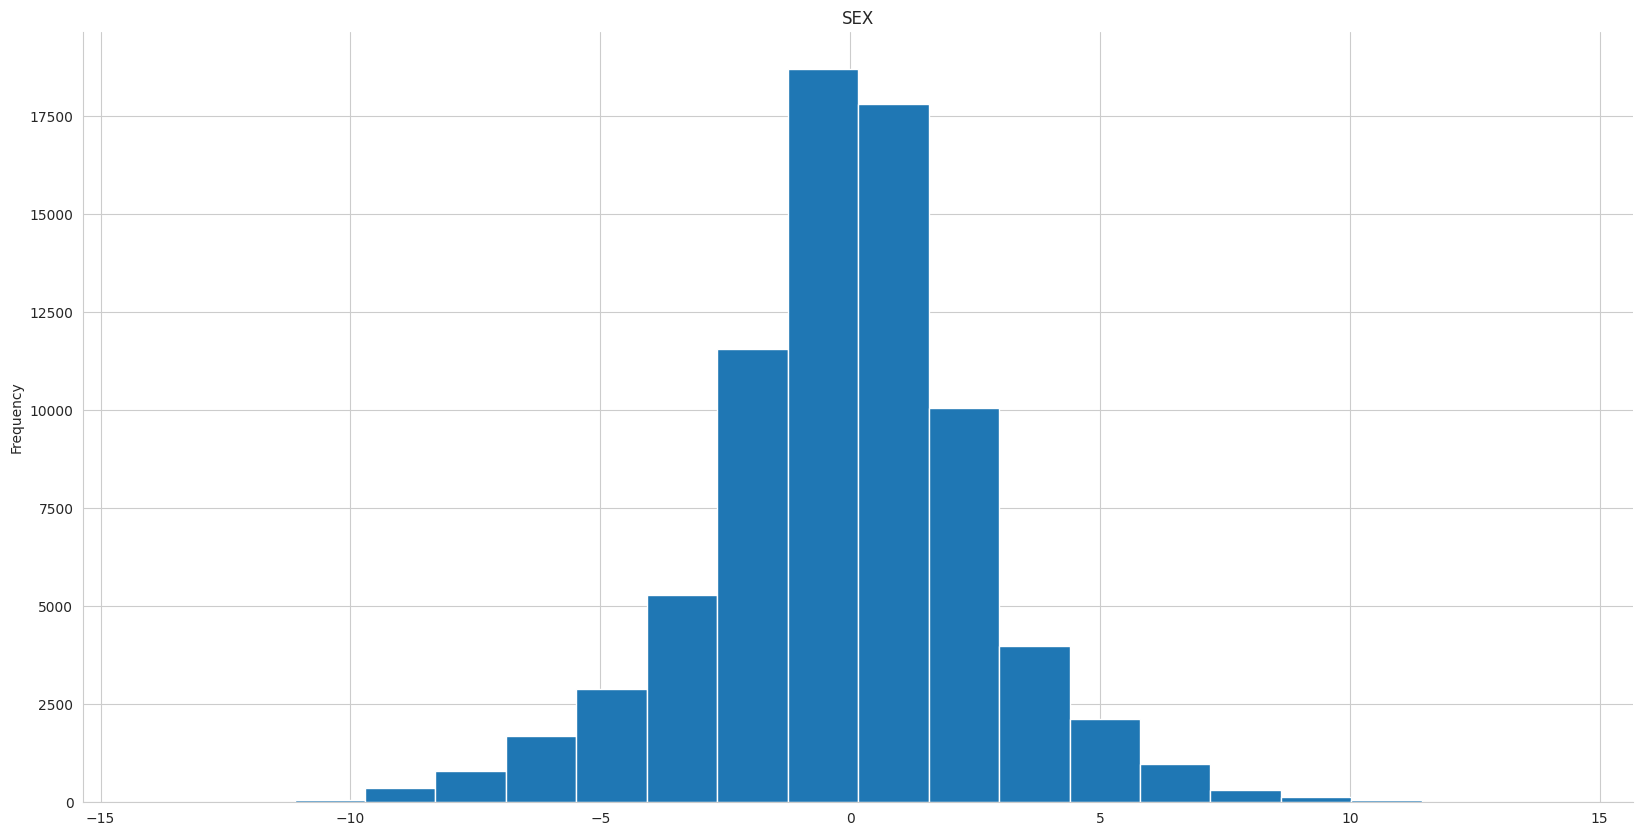

In [76]:
# @title SEX

from matplotlib import pyplot as plt
balancedr['SEX'].plot(kind='hist', bins=20, title='SEX')
plt.gca().spines[['top', 'right',]].set_visible(False)

Balanced SEX distribution

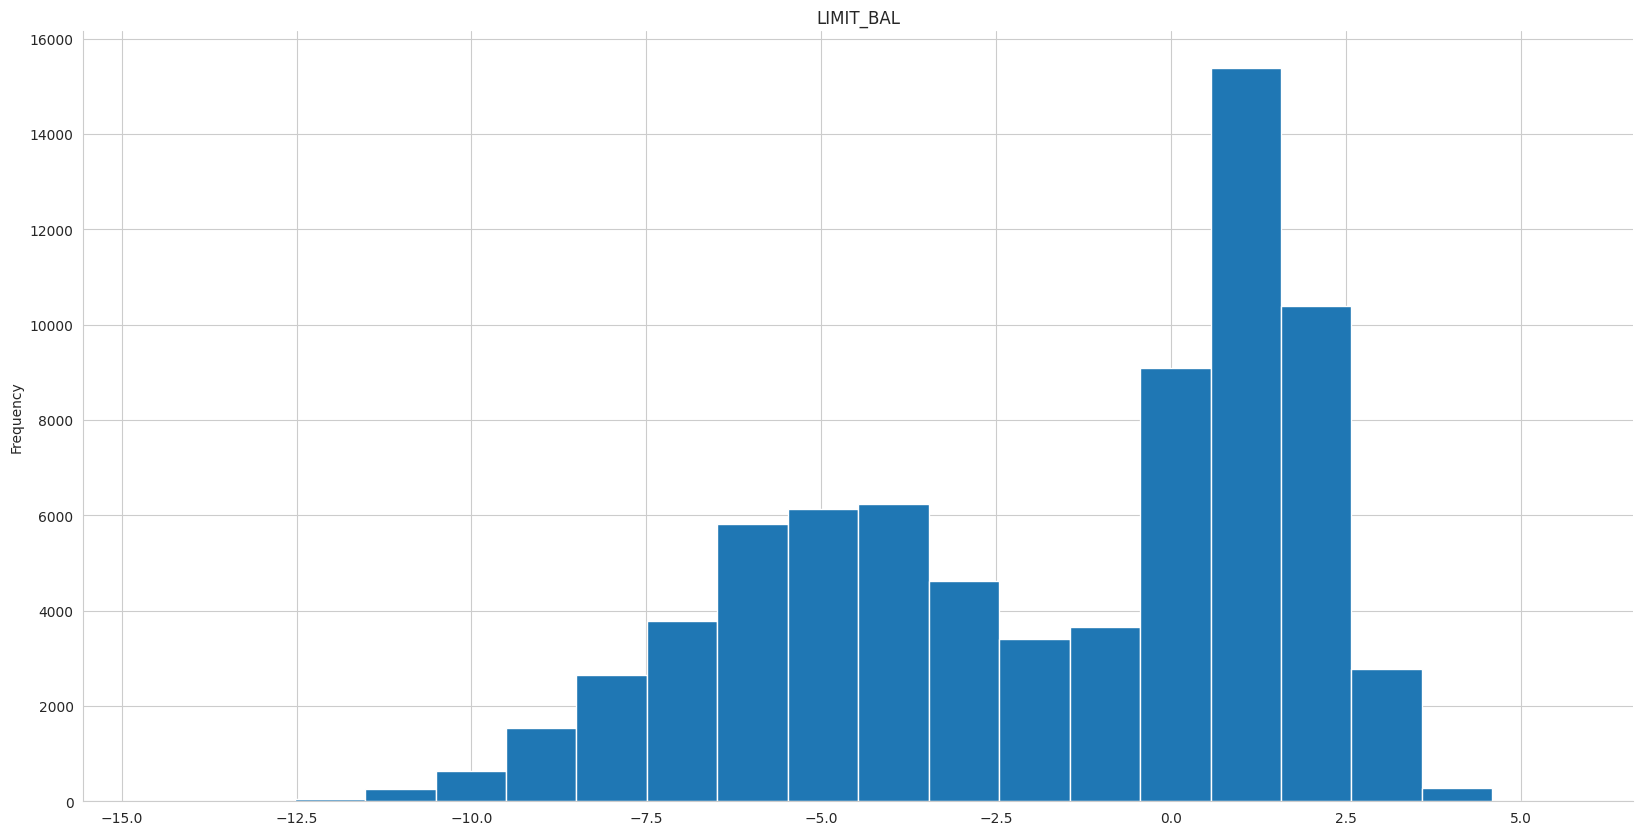

In [77]:
# @title LIMIT_BAL

from matplotlib import pyplot as plt
balancedr['LIMIT_BAL'].plot(kind='hist', bins=20, title='LIMIT_BAL')
plt.gca().spines[['top', 'right',]].set_visible(False)

balanced  LIMI_BAL distribution

In [78]:
balancedr['DEFAULT_PAYMENT'] = y_smote

<Axes: xlabel='DEFAULT_PAYMENT', ylabel='count'>

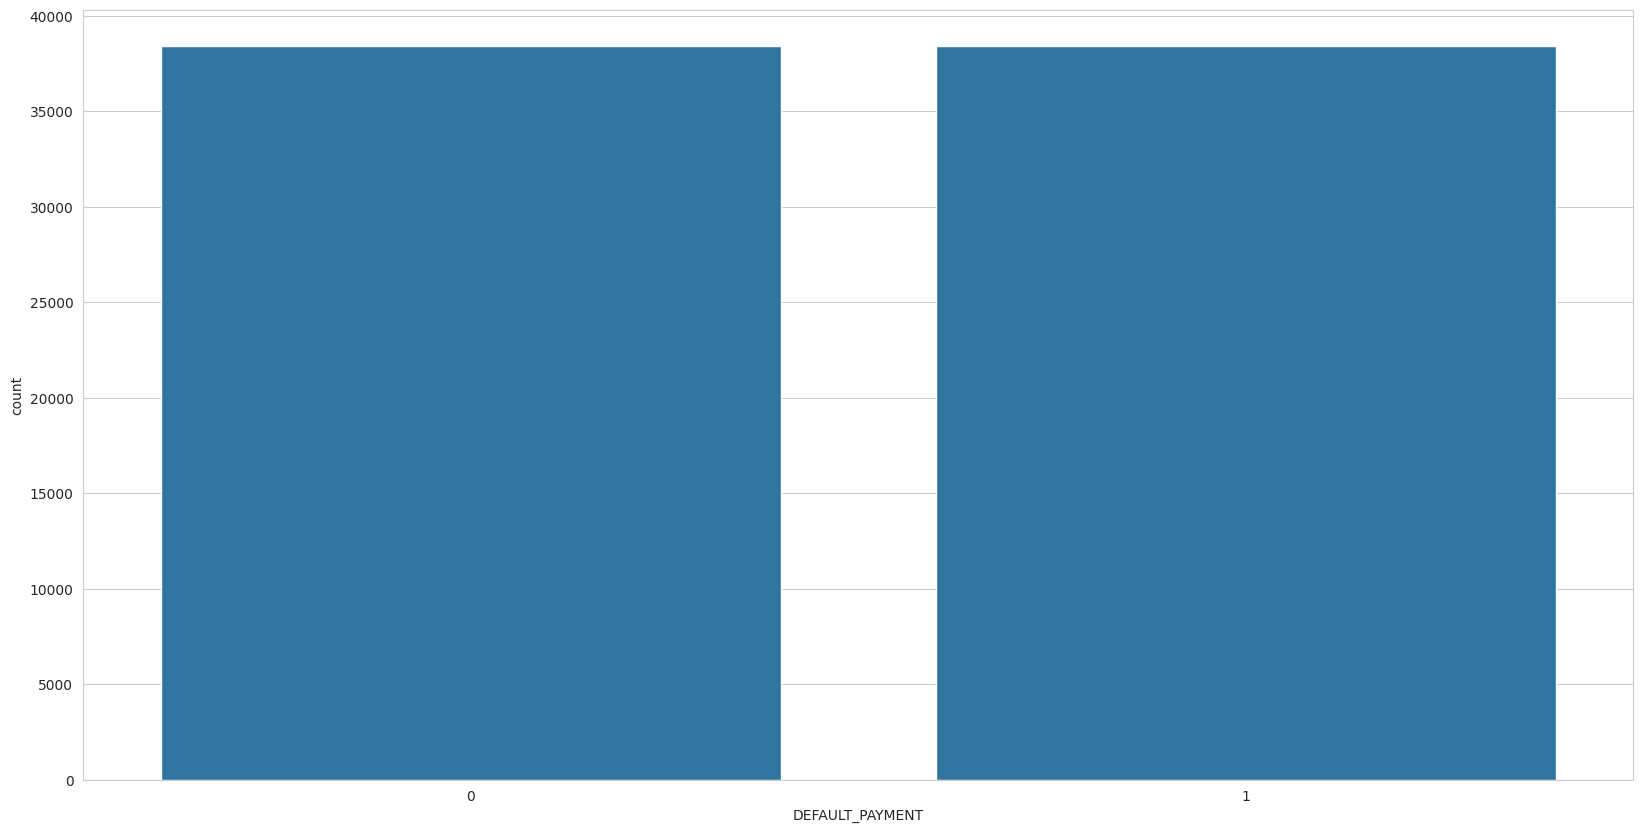

In [79]:
sns.countplot (x = 'DEFAULT_PAYMENT', data = balancedr)

balanced distribution of the default_payment

SAVING CLEANED DATA

In [80]:
balancedr.to_csv('clean_creditt.csv')